<a href="https://colab.research.google.com/github/alvarodonascimento/tcc/blob/main/TCC_%C3%81lvaro_Magalh%C3%A3es_do_Nascimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TCC - Análise de Séries Financeiras das Empresas de Planos de Saúde Durante o Período da Pandemia de Covid-19<br>
#### Professor Sérgio Assunção Monteiro
#### Aluno: Álvaro Magalhães do Nascimento

#### Importação das bibliotecas

In [1]:
import matplotlib.pyplot as plt        # biblioteca de visualização padrão no Python
import yfinance as yf                  # biblioteca yfinance

In [2]:
# lista de ações a serem analisadas
acoes = ['HAPV3.SA', 'QUAL3.SA', 'BOVA11.SA']

In [3]:
# retorna apenas a coluna Adj Close que é o valor de fechamento ajustado
df = yf.download(acoes, start='2020-01-01', end='2022-12-31')['Adj Close'];

[*********************100%%**********************]  3 of 3 completed


#### Tratamento dos Campos

In [4]:
# renomeia o nome das colunas
df = df.rename(columns={
    'HAPV3.SA' : 'HAPV',
    'QUAL3.SA' : 'QUAL',
    'BOVA11.SA' : 'BOVA11'
})

In [5]:
# verifica a soma dos valores nulos em cada campo
df.isnull().sum()

BOVA11    0
HAPV      0
QUAL      0
dtype: int64

In [6]:
# retorna a quantidade de linhas e colunas respectivamente
df.shape

(745, 3)

In [7]:
df

,BOVA11,HAPV,QUAL
Date,,,
2020-01-02,114.239998,13.164598,34.719151
2020-01-03,113.800003,13.721377,35.436554
2020-01-06,112.589996,13.298296,36.889091
2020-01-07,112.239998,12.932871,35.950264
2020-01-08,111.949997,12.666745,35.259418
...,...,...,...
2022-12-23,106.000000,5.280000,6.086616
2022-12-26,105.150002,5.180000,5.958786
2022-12-27,104.900002,5.010000,5.801459


In [8]:
# apresenta algumas estatísticas
df.describe()

,BOVA11,HAPV,QUAL
count,745.000000,745.000000,745.000000
mean,104.384940,11.587415,20.825307
std,11.674340,3.321724,8.425962
min,61.139999,4.390000,4.975489
25%,98.360001,8.960861,13.884170
50%,106.489998,12.130000,21.463818
75%,112.239998,14.480861,27.800995
max,125.750000,18.151423,39.847309


## Normalização dos Dados

In [9]:
df_normalizada = df / df.iloc[0]

In [10]:
df_normalizada

,BOVA11,HAPV,QUAL
Date,,,
2020-01-02,1.000000,1.000000,1.000000
2020-01-03,0.996149,1.042294,1.020663
2020-01-06,0.985557,1.010156,1.062500
2020-01-07,0.982493,0.982398,1.035459
2020-01-08,0.979954,0.962182,1.015561
...,...,...,...
2022-12-23,0.927871,0.401076,0.175310
2022-12-26,0.920431,0.393480,0.171628
2022-12-27,0.918242,0.380566,0.167097


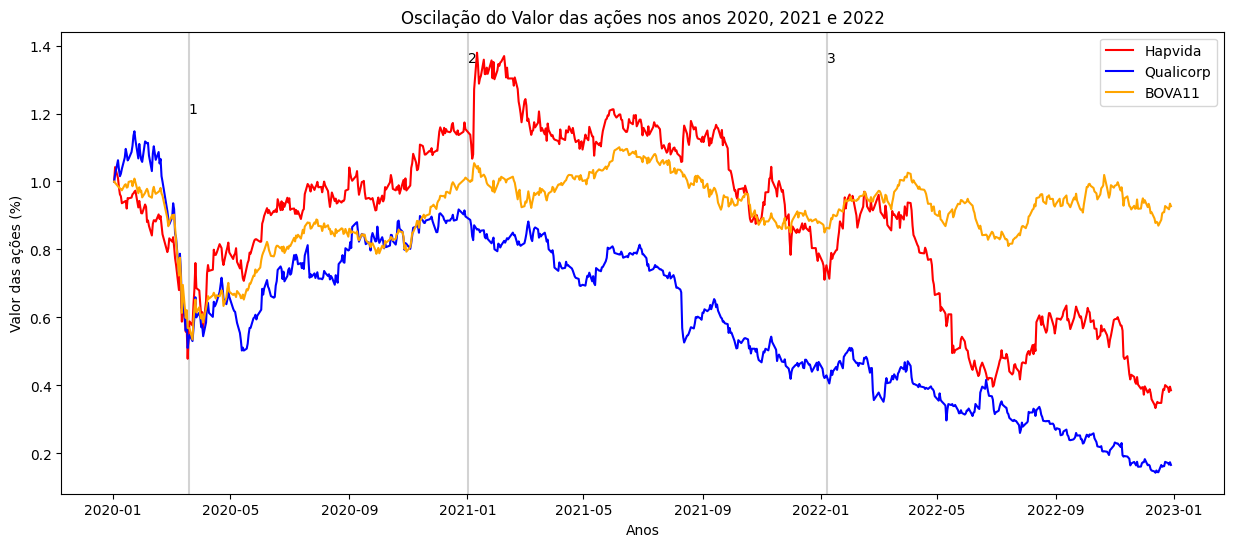

In [11]:
fig, ax = plt.subplots(figsize=(15,6)) # cria uma figure contendo gráficos simples

ax.annotate("1", xy=(18340, 1.2))
ax.axvline(x=18340, color='lightgray')

ax.annotate("2", xy=(18629, 1.35))
ax.axvline(x=18629, color='lightgray')

ax.annotate("3", xy=(19000, 1.35))
ax.axvline(x=19000, color='lightgray')

ax.plot(df_normalizada['HAPV'], color='red', label='Hapvida') # imprime os dados no gráfico ----> color='red', linewidth=3, linestyle='--'
ax.plot(df_normalizada['QUAL'], color='blue', label='Qualicorp')
ax.plot(df_normalizada['BOVA11'], color='orange', label='BOVA11')

ax.set_title("Oscilação do Valor das ações nos anos 2020, 2021 e 2022")
ax.set_xlabel('Anos')
ax.set_ylabel('Valor das ações (%)')

ax.legend()
